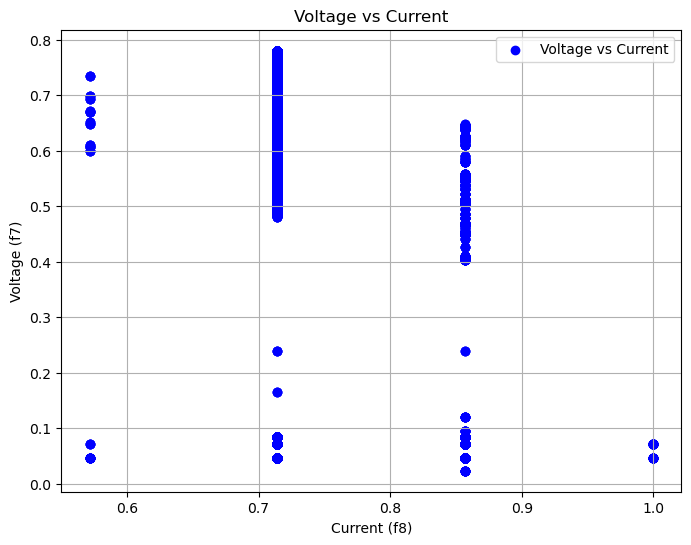

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('tube1.csv')
filtered_df = df[(df['f3'] == 0) & (df['f4'] == 0) & (df['f5'] == 0.875)]


voltage = filtered_df['f7']
current = filtered_df['f8']

# 绘制电压与电流的图像
plt.figure(figsize=(8, 6))
plt.scatter(voltage, current, c='blue', label='Voltage vs Current')
plt.title('Voltage vs Current')
plt.ylabel('Voltage (f7)')
plt.xlabel('Current (f8)')
plt.grid(True)
plt.legend()
plt.show()


In [2]:
d= filtered_df['f7']/filtered_df['f8']

In [3]:
d

0         1.56914
1         1.56914
2         1.56914
6         1.56914
7         1.56914
           ...   
180661    1.10957
180662    1.10957
180666    1.10957
180667    1.10957
180668    1.10957
Length: 60315, dtype: float64

In [4]:
unique_values = d.unique()

print(unique_values)


[ 1.56914024 15.03759398  1.00426814 18.04511278  1.36054422  0.92017483
 11.8226601  10.23454158  1.29282482  8.52878465  1.09051254  1.03332472
  2.12295444  0.93218364  1.08636611  1.03145952  0.97847358  0.99725754
  1.08225108  1.07411386  1.82370821  1.07009096  0.97016735  1.11172874
  1.08843537  1.1360409   1.08020524  1.1052777   1.09679188  1.02223358
  0.95716679  1.28700129  1.10101844  1.011378    1.03707545  1.03896104
  1.12485939  1.01317123  1.20554551  9.85221675  1.25865324  1.02960103
  1.05429626  1.19545726  1.14285714  1.07816712  1.14975568  0.9246417
  1.04849279  1.06809079  1.156738    1.09259765  0.97680098  1.43936668
  0.999001    1.07613667  1.33407449  1.06213489  1.12044818  0.96362322
  1.37970681  0.98522167  0.92314793  1.10314396  1.12264945  0.99378882
  0.98692327  1.05820106  1.48102438  1.36869119  1.38696255  1.02406554
  1.19796346  1.13378685  1.11389585  1.06609808  1.16380564  0.93523498
  1.14744693  1.00250627  1.04465918  0.92165899  0.

In [5]:
mean_value = d.mean()

print("均值:", mean_value)

均值: 14.091033195512466


In [6]:
value = d.median()

print("均值:", value)

均值: 18.045112781954884


D:\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31665 (\N{CJK UNIFIED IDEOGRAPH-7BB1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26597 (\N{CJK UNIFIED IDEOGRAPH-67E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ANACONDA\lib\site-packages\IPython\core\pylabtools.py:152: User

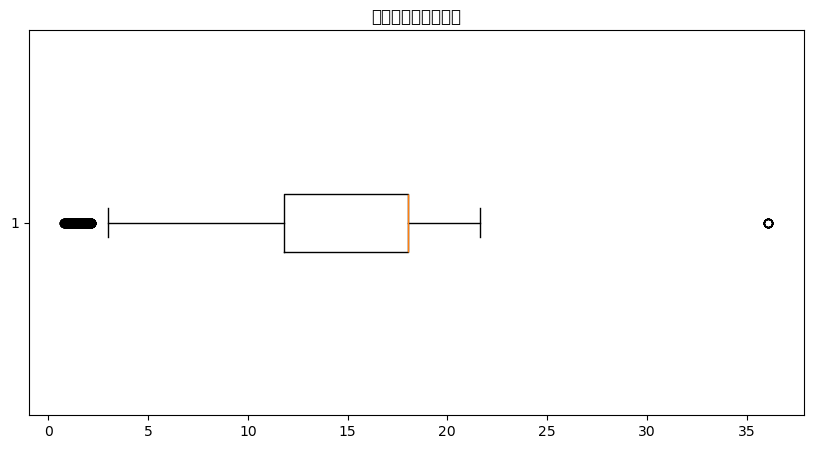

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.boxplot(d, vert=False)
plt.title("箱线图：查看异常值")
plt.show()


In [8]:
Q1 = d.quantile(0.25)
Q3 = d.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = d[(d < lower_bound) | (d > upper_bound)]


In [9]:
outliers

0         1.56914
1         1.56914
2         1.56914
6         1.56914
7         1.56914
           ...   
180661    1.10957
180662    1.10957
180666    1.10957
180667    1.10957
180668    1.10957
Length: 8006, dtype: float64

In [10]:
outlier_mask = (d < lower_bound) | (d > upper_bound)

f2_outliers = filtered_df.loc[outlier_mask, 'f2']

In [11]:
f2_outliers

0              0
1              1
2              2
6              7
7              8
           ...  
180661    194608
180662    194609
180666    194613
180667    194614
180668    194615
Name: f2, Length: 8006, dtype: int64

In [12]:
mean = d.mean()
std = d.std()

outliers = d[(d < mean - 3 * std) | (d > mean + 3 * std)]
outliers

68805     36.090226
68806     36.090226
68807     36.090226
68808     36.090226
68809     36.090226
68810     36.090226
68811     36.090226
162520    36.090226
162521    36.090226
162522    36.090226
162523    36.090226
dtype: float64